In [1]:
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import math
from matplotlib import rcParams

In [20]:
!grep "^AF" ../references/sfon_with_mito.bed > ../references/mito.bed

In [356]:
!mkdir -p /storage/home/nsl5160/scratch/brook_trout/mosdepth

In [357]:
for samp in glob.glob("/storage/home/nsl5160/scratch/brook_trout/mapped/*.markdup.bam"):
    task = "mosdepth"
    mem = "32"
    cpus = "4"
    infile = samp
    outprefix = samp.replace(".markdup.bam", "").replace("mapped", "mosdepth")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outprefix], shell=True)

Submitted batch job 33179024
Submitted batch job 33179025
Submitted batch job 33179026
Submitted batch job 33179027
Submitted batch job 33179028
Submitted batch job 33179029
Submitted batch job 33179030
Submitted batch job 33179031
Submitted batch job 33179032
Submitted batch job 33179033
Submitted batch job 33179034
Submitted batch job 33179035
Submitted batch job 33179036
Submitted batch job 33179037
Submitted batch job 33179038
Submitted batch job 33179039
Submitted batch job 33179040
Submitted batch job 33179041
Submitted batch job 33179042
Submitted batch job 33179043
Submitted batch job 33179045
Submitted batch job 33179046
Submitted batch job 33179047
Submitted batch job 33179048
Submitted batch job 33179049
Submitted batch job 33179050
Submitted batch job 33179051
Submitted batch job 33179052
Submitted batch job 33179053
Submitted batch job 33179054
Submitted batch job 33179055
Submitted batch job 33179056
Submitted batch job 33179057
Submitted batch job 33179058
Submitted batc

In [403]:
for samp in glob.glob("/storage/home/nsl5160/scratch/brook_trout/sra_mapped/*.markdup.bam"):
    task = "mosdepth"
    mem = "32"
    cpus = "4"
    infile = samp
    outprefix = samp.replace(".markdup.bam", "").replace("sra_mapped", "mosdepth")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outprefix], shell=True)

Submitted batch job 33181212
Submitted batch job 33181213
Submitted batch job 33181214
Submitted batch job 33181215
Submitted batch job 33181216
Submitted batch job 33181217
Submitted batch job 33181218
Submitted batch job 33181219
Submitted batch job 33181220
Submitted batch job 33181221
Submitted batch job 33181222
Submitted batch job 33181223
Submitted batch job 33181224
Submitted batch job 33181225
Submitted batch job 33181226
Submitted batch job 33181227
Submitted batch job 33181228
Submitted batch job 33181229
Submitted batch job 33181230
Submitted batch job 33181231
Submitted batch job 33181232
Submitted batch job 33181233
Submitted batch job 33181234
Submitted batch job 33181235
Submitted batch job 33181236
Submitted batch job 33181237
Submitted batch job 33181238
Submitted batch job 33181239
Submitted batch job 33181240
Submitted batch job 33181241
Submitted batch job 33181242
Submitted batch job 33181243
Submitted batch job 33181244
Submitted batch job 33181245
Submitted batc

In [363]:
meta = pd.read_csv("../ST_metadata.csv")
sra_meta = pd.read_csv("../SraRunTable.csv")
sra_meta["Sample_ID"] = sra_meta["Run"]
sra_meta = sra_meta[["geo_loc_name", "Sample_ID"]]
sra_meta["Source"] = sra_meta["geo_loc_name"].str.replace("Canada:", "").str.replace("\\", "")
meta = pd.concat([meta, sra_meta[["Sample_ID", "Source"]]]).reset_index(drop=True)

In [ ]:
meta["Repeat_Content"] = np.nan
meta["Mapping_Coverage"] = np.nan
for i in range(len(meta)):
    try:
        repeats = pd.read_csv("~/scratch/brook_trout/mosdepth/" + 
                          meta["Sample_ID"][i] + "_repeats.regions.bed.gz", 
                          header = None, compression = "gzip", sep = "\t")
        repeats["len"] = repeats[2] - repeats[1]
        repeats["bases"] = repeats[3] * repeats["len"]
        nonrepeats = pd.read_csv("~/scratch/brook_trout/mosdepth/" + 
                          meta["Sample_ID"][i] + "_nonrepeats.regions.bed.gz", 
                          header = None, compression = "gzip", sep = "\t")
        nonrepeats["len"] = nonrepeats[2] - nonrepeats[1]
        nonrepeats["bases"] = nonrepeats[3] * nonrepeats["len"]
        repeats = repeats.bases.sum()
        nonrepeats = nonrepeats.bases.sum()
        meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
        meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
    except:
        pass

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_795555/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_795555/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepea

In [ ]:
meta[meta["Mapping_Coverage"].notna()][meta["Mapping_Coverage"] > 0.5].sort_values("Repeat_Content")

In [438]:
meta.loc[meta["Sample_ID"].str.contains("SRR"), "Source"] = "Mistassini"

In [450]:
meta.loc[meta["Source"].str.contains("Honandaga"), "Source"] = "Honnedaga"

/tmp/ipykernel_795555/860244470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data = meta[meta["Mapping_Coverage"].notna()][meta["Mapping_Coverage"] > 0.5], x = "Mapping_Coverage",


<Axes: xlabel='Mapping_Coverage', ylabel='Repeat_Content'>

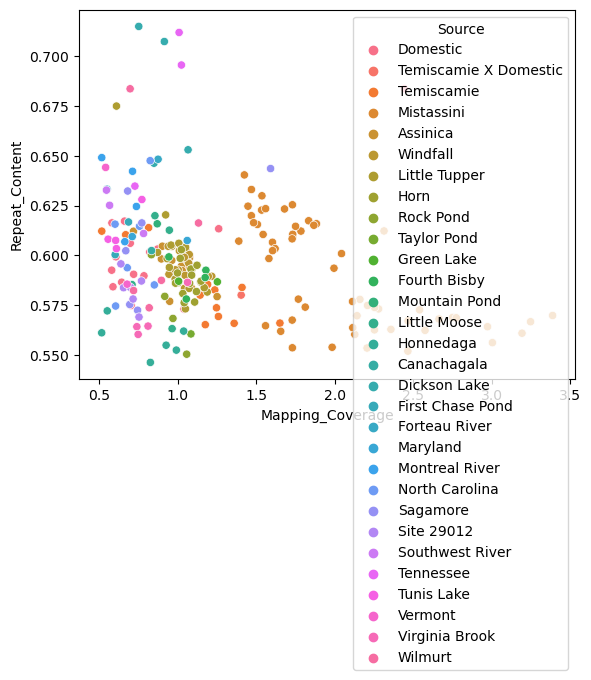

In [451]:
sns.scatterplot(data = meta[meta["Mapping_Coverage"].notna()][meta["Mapping_Coverage"] > 0.5], x = "Mapping_Coverage", 
                y = "Repeat_Content", hue = "Source")

In [ ]:
meta["Repeat_Content"][meta["Mapping_Coverage"].notna()][meta["Mapping_Coverage"] > 0.5].mean()

In [491]:
meta[meta["Mapping_Coverage"].notna()].value_counts("Source")

Source
 Mistassini Lake, Rupert River    32
 Mistassini Lake, Cheno River     29
Domestic                          15
Temiscamie                        15
Little Tupper                     15
Windfall                          15
Assinica                          15
Horn                              14
Vermont                            7
Honnedaga                          6
Maryland                           6
Tennessee                          6
North Carolina                     6
Sagamore                           6
Site 29012                         6
Montreal River                     5
Wilmurt                            5
Little Moose                       5
Dickson Lake                       5
Tunis Lake                         5
Virginia Brook                     4
Temiscamie X Domestic              4
Rock Pond                          4
Fourth Bisby                       4
Southwest River                    3
Forteau River                      3
First Chase Pond               

In [441]:
meta.loc[meta["Water"] != "Hatchery", "Water"] = "Wild"

<Axes: xlabel='Repeat_Content', ylabel='Water'>

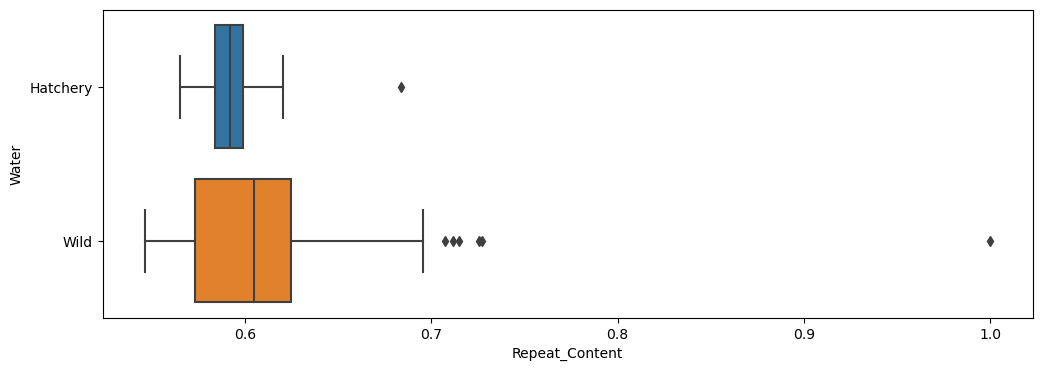

In [490]:
rcParams['figure.figsize'] = 12,4
sns.boxplot(data=meta[meta["Repeat_Content"].notna()], 
            x="Repeat_Content", y="Water")

In [2]:
rcParams['figure.figsize'] = 8,12
sns.boxplot(data=meta[meta["Mapping_Coverage"].notna()][meta["Repeat_Content"] != 1], 
            x="Repeat_Content", y="Source")
sns.stripplot(data=meta[meta["Mapping_Coverage"].notna()][meta["Repeat_Content"] != 1], 
            x="Repeat_Content", y="Source")
plt.axvline(meta["Repeat_Content"].median(), 0,20)

NameError: name 'rcParams' is not defined

In [444]:
meta["hatcherysort"] = np.nan
meta.loc[meta["Source"] == "Domestic", "hatcherysort"] = 1
meta.loc[meta["Source"] == "Temiscamie X Domestic", "hatcherysort"] = 2
meta.loc[meta["Source"] == "Temiscamie", "hatcherysort"] = 3
meta.loc[meta["Source"] == "Mistassini", "hatcherysort"] = 4
meta.loc[meta["Source"] == "Assinica", "hatcherysort"] = 5
meta.loc[meta["Source"] == "Windfall", "hatcherysort"] = 6
meta.loc[meta["Source"] == "Little Tupper", "hatcherysort"] = 7
meta.loc[meta["Source"] == "Horn", "hatcherysort"] = 8

In [1]:
meta[meta["Source"] == "Maryland"]

NameError: name 'meta' is not defined

In [445]:
meta = meta.sort_values("hatcherysort").reset_index(drop=True)

In [449]:
meta[meta["Source"] == "Little Tupper"]

,Sample_ID,FISH_N,Strain,Source,Water,NY Native?,Notes,Batch,Repeat_Content,Mapping_Coverage,hatcherysort
128,LTup_15,NaN,NaN,Little Tupper,Wild,NaN,NaN,2.0,0.674863,0.608393,7.0
129,LTup_2,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.593983,0.945393,7.0
130,LTup_1,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.593311,1.090102,7.0
131,LTup_9,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.583455,1.071398,7.0
132,LTup_10,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.605157,0.956054,7.0
133,LTup_11,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.620307,0.921881,7.0
134,LTup_12,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.606063,1.005971,7.0
135,LTup_14,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.586568,1.145403,7.0
136,LTup_13,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.604075,1.048926,7.0
137,LTup_7,NaN,Little Tupper,Little Tupper,Hatchery,Yes,NaN,1.0,0.588122,0.982461,7.0


/tmp/ipykernel_795555/2083334993.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=meta[meta["Repeat_Content"].notna()]


<Axes: xlabel='Repeat_Content', ylabel='Source'>

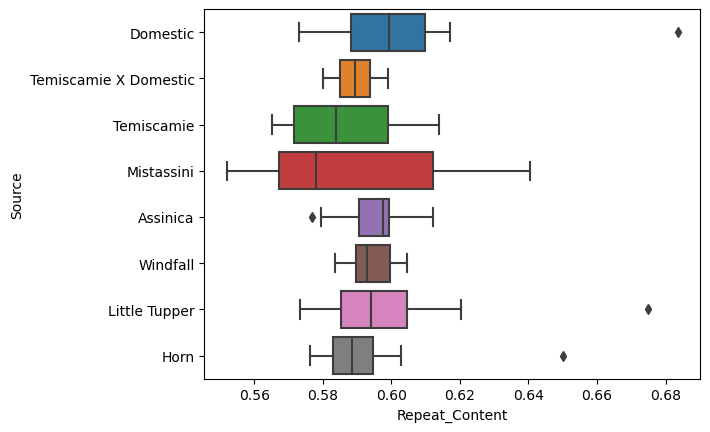

In [446]:
sns.boxplot(data=meta[meta["Repeat_Content"].notna()]
            [meta["Repeat_Content"] != 1]
            [meta["hatcherysort"].notna()], 
            x="Repeat_Content", y="Source")

In [237]:
!cat ../repeat_mappers.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=reex
#SBATCH --account=open

source ~/.bashrc
conda activate ipyrad

INDIR=$1
INPREFIX=$2
OUTDIR=$3

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTDIR}

sambamba view -t ${SLURM_NTASKS} -f bam \
    -F "not secondary_alignment and not supplementary" \
    --regions ../references/repeats.bed \
    ${INDIR}/${INPREFIX}.markdup.bam \
    > ${OUTDIR}/${INPREFIX}_repeats.bam

sambamba sort -t ${SLURM_NTASKS} --sort-by-name \
    ${OUTDIR}/${INPREFIX}_repeats.bam \

sambamba view -t ${SLURM_NTASKS} -f bam \
    -F "not secondary_alignment and not supplementary" \
    --regions ../references/nonrepeats.bed \
    ${INDIR}/${INPREFIX}.markdup.bam \
    > ${OUTDIR}/${INPREFIX}_nonrepeats.bam

sambamba sort -t ${SLURM_NTASKS} --sort-by-name \
    ${OUTDIR}/${INPREFIX}_nonrepeats.bam

rm ${OUTDIR}/${INPREFIX}_repeats.bam
rm ${OUTDIR}/${INPREFIX}_nonrepeats.bam

samtools fastq ${OUTDIR}/${INPREFIX}_repeats.sorted.bam \
    -1 ${OUTDIR}/$

In [1]:
from Bio import SeqIO

def fasta_to_bed(fasta_file, bed_file):
    with open(bed_file, 'w') as bed:
        for record in SeqIO.parse(fasta_file, "fasta"):
            seq = str(record.seq)
            chrom = record.id
            start = None
            for i, base in enumerate(seq):
                if base.islower() and start is None:
                    start = i
                elif not base.islower() and start is not None:
                    bed.write(f"{chrom}\t{start}\t{i}\n")
                    start = None
            if start is not None:  # Handle case where soft-masked region goes to the end
                bed.write(f"{chrom}\t{start}\t{len(seq)}\n")

# Example usage
fasta_to_bed("../references/sfon.fa", 
             "../references/repeats.bed")

In [8]:
!awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../references/repeats.bed

1385402114


In [9]:
!awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../references/nonrepeats.bed

1110782996


In [9]:
%%bash
source ~/.bashrc
conda activate ipyrad
bedtools subtract -a ../references/sfon.bed -b ../references/repeats.bed \
    > ../references/nonrepeats.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [20]:
!mkdir -p /storage/home/nsl5160/scratch/brook_trout/repeat_mappers

In [188]:
depths = []
for file in glob.glob("/storage/home/nsl5160/scratch/brook_trout/mapped/*.win.stat.gz"):
    tmp = pd.read_csv(file, 
                comment = "#", compression = "gzip", sep = "\t", header = None)
    tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
    depths = depths + [tmp[7].median()]

/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipyke

/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipyke

/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipyke

/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipyke

/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_795555/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipyke

In [189]:
samps = [i.split("/")[7].split(".")[0] for i in glob.glob("/storage/home/nsl5160/scratch/brook_trout/mapped/*.win.stat.gz")]

In [190]:
depths = pd.DataFrame([samps, depths]).T

In [191]:
depths.columns = ["Sample_ID", "Coverage"]

In [207]:
meta = pd.read_csv("../ST_metadata.csv")

In [208]:
meta = meta.merge(depths, how = "left", on = "Sample_ID")

In [209]:
sra = pd.read_csv("../SraRunInfo.csv")

In [210]:
sra["Sample_ID"] = sra["Run"]

In [211]:
meta = pd.concat([meta, sra[["Sample_ID"]]]).reset_index(drop=True)

In [223]:
!cat ../repeat_mappers.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=reex
#SBATCH --account=open

source ~/.bashrc
conda activate ipyrad

INDIR=$1
INPREFIX=$2
OUTDIR=$3

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTDIR}

sambamba view -t ${SLURM_NTASKS} -f bam \
    -F "not secondary_alignment and not supplementary" \
    --regions ../references/repeats.bed \
    ${INDIR}/${INPREFIX}.markdup.bam \
    > ${OUTDIR}/${INPREFIX}_repeats.bam

sambamba sort -t ${SLURM_NTASKS} --sort-by-name \
    ${OUTDIR}/${INPREFIX}_repeats.bam \

sambamba view -t ${SLURM_NTASKS} -f bam \
    -F "not secondary_alignment and not supplementary" \
    --regions ../references/nonrepeats.bed \
    ${INDIR}/${INPREFIX}.markdup.bam \
    > ${OUTDIR}/${INPREFIX}_nonrepeats.bam

sambamba sort -t ${SLURM_NTASKS} --sort-by-name \
    ${OUTDIR}/${INPREFIX}_nonrepeats.bam

rm ${OUTDIR}/${INPREFIX}_repeats.bam
rm ${OUTDIR}/${INPREFIX}_nonrepeats.bam

samtools fastq ${OUTDIR}/${INPREFIX}_repeats.sorted.bam \
    -1 ${OUTDIR}/$

In [186]:
for samp in [i.split("/")[7].split(".")[0] for i in glob.glob("/storage/home/nsl5160/scratch/brook_trout/sra_mapped/*.markdup.bam")]:
    task = "repeat_mappers"
    mem = "20"
    cpus = "2"
    indir = "/storage/home/nsl5160/scratch/brook_trout/sra_mapped/"
    infile = samp
    outdir = "/storage/home/nsl5160/scratch/brook_trout/repeat_mappers/" + samp
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + infile + " " + outdir], shell=True)

Submitted batch job 33162605
Submitted batch job 33162606
Submitted batch job 33162607
Submitted batch job 33162608
Submitted batch job 33162609
Submitted batch job 33162610
Submitted batch job 33162611
Submitted batch job 33162612
Submitted batch job 33162613
Submitted batch job 33162614
Submitted batch job 33162615
Submitted batch job 33162616
Submitted batch job 33162617
Submitted batch job 33162618
Submitted batch job 33162619
Submitted batch job 33162620
Submitted batch job 33162621
Submitted batch job 33162622
Submitted batch job 33162623
Submitted batch job 33162624
Submitted batch job 33162625
Submitted batch job 33162626
Submitted batch job 33162627
Submitted batch job 33162628
Submitted batch job 33162629
Submitted batch job 33162630
Submitted batch job 33162631
Submitted batch job 33162632
Submitted batch job 33162633
Submitted batch job 33162634
Submitted batch job 33162635
Submitted batch job 33162636
Submitted batch job 33162637
Submitted batch job 33162638
Submitted batc

In [140]:
for samp in meta["Sample_ID"][meta["Repeat_Content"].isna()].tolist():
    task = "repeat_mappers"
    mem = "64"
    cpus = "2"
    indir = "/storage/home/nsl5160/scratch/brook_trout/mapped/"
    infile = samp
    outdir = "/storage/home/nsl5160/scratch/brook_trout/repeat_mappers/" + samp
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + infile + " " + outdir], shell=True)

Submitted batch job 33106492
Submitted batch job 33106493
Submitted batch job 33106494
Submitted batch job 33106495
Submitted batch job 33106497
Submitted batch job 33106498
Submitted batch job 33106499
Submitted batch job 33106500
Submitted batch job 33106501
Submitted batch job 33106502
Submitted batch job 33106503
Submitted batch job 33106504
Submitted batch job 33106505
Submitted batch job 33106506
Submitted batch job 33106507


In [224]:
meta["Repeat_Content"] = np.nan
meta["Mapping_Coverage"] = np.nan
for i in range(len(meta)):
    try:
        tmp = pd.read_csv("~/scratch/brook_trout/repeat_mappers/" + 
                          meta["Sample_ID"][i] + "/" + 
                          meta["Sample_ID"][i] + "_bpcounts.txt", 
                          header = None)
        tmp1 = tmp[0][0] / tmp[0].sum()
        meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
        meta["Repeat_Content"][i] = tmp1
    except:
        pass

/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = tmp1
/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:

/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = tmp1
/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:

/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = tmp1
/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:

/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = tmp1
/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:

/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = tmp1
/tmp/ipykernel_795555/2269644394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = tmp[0].sum() / 2496201734
/tmp/ipykernel_795555/2269644394.py:

In [229]:
meta.loc[meta["Sample_ID"].str.contains("SRR"), "Source"] = "Mistassini Lake"

In [230]:
meta[meta["Sample_ID"].str.contains("SRR")][meta["Repeat_Content"].notna()]

/tmp/ipykernel_795555/3078658884.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta[meta["Sample_ID"].str.contains("SRR")][meta["Repeat_Content"].notna()]


,Sample_ID,FISH_N,Strain,Source,Water,NY Native?,Notes,Batch,Coverage,Repeat_Content,Mapping_Coverage
200,SRR30664623,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.576149,2.503241
201,SRR30664622,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.558451,2.621813
203,SRR30664620,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.565617,2.606762
219,SRR30664603,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.584023,2.423140
241,SRR30664578,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.546348,0.107642
249,SRR30664570,NaN,NaN,Mistassini Lake,NaN,NaN,NaN,NaN,NaN,0.543705,0.215475


In [232]:
meta.loc[meta["Water"] != "Hatchery", "Water"] = "Wild"

/tmp/ipykernel_795555/123613184.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=meta[meta["Repeat_Content"].notna()][meta["Coverage"] > 0.4][meta["Repeat_Content"] != 1],


<Axes: xlabel='Repeat_Content', ylabel='Water'>

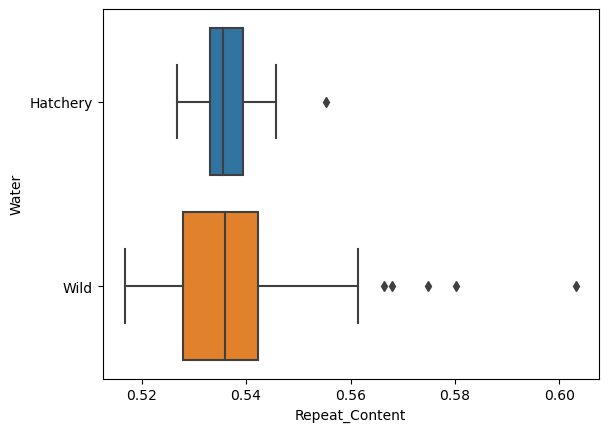

In [168]:
sns.boxplot(data=meta[meta["Repeat_Content"].notna()][meta["Coverage"] > 0.4][meta["Repeat_Content"] != 1], 
            x="Repeat_Content", y="Water")

In [233]:
meta["hatcherysort"] = np.nan
meta.loc[meta["Source"] == "Domestic", "hatcherysort"] = 1
meta.loc[meta["Source"] == "Temiscamie X Domestic", "hatcherysort"] = 2
meta.loc[meta["Source"] == "Temiscamie", "hatcherysort"] = 3
meta.loc[meta["Source"] == "Mistassini Lake", "hatcherysort"] = 4
meta.loc[meta["Source"] == "Assinica", "hatcherysort"] = 5
meta.loc[meta["Source"] == "Windfall", "hatcherysort"] = 6
meta.loc[meta["Source"] == "Little Tupper", "hatcherysort"] = 7
meta.loc[meta["Source"] == "Horn", "hatcherysort"] = 8

In [234]:
meta = meta.sort_values("hatcherysort").reset_index(drop=True)

/tmp/ipykernel_795555/2083334993.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=meta[meta["Repeat_Content"].notna()]


<Axes: xlabel='Repeat_Content', ylabel='Source'>

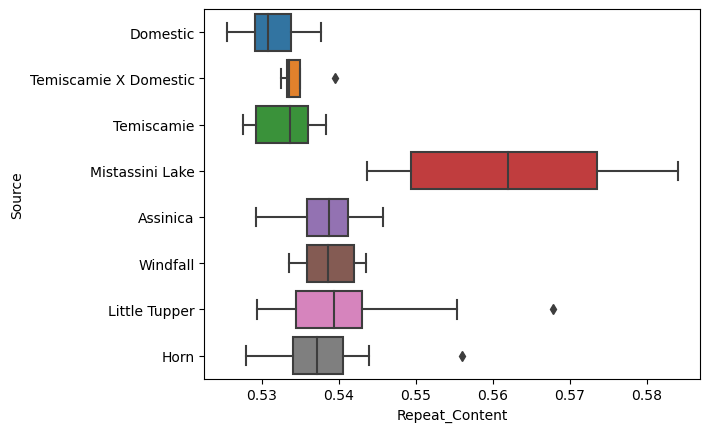

In [236]:
sns.boxplot(data=meta[meta["Repeat_Content"].notna()]
            [meta["Repeat_Content"] != 1]
            [meta["hatcherysort"].notna()], 
            x="Repeat_Content", y="Source")

In [87]:
import numpy as np
from scipy import stats
from scipy.stats import permutation_test

In [164]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
result = permutation_test((meta["Repeat_Content"][meta["Source"] == "Domestic"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy(), 
                           meta["Repeat_Content"][meta["Source"] == "Temiscamie"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy()), 
                          statistic, permutation_type='independent', 
                          n_resamples=10000, alternative='two-sided')
print(result.pvalue)

0.46595340465953405


In [165]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
result = permutation_test((meta["Repeat_Content"][meta["Source"] == "Domestic"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy(), 
                           meta["Repeat_Content"][meta["Source"] == "Temiscamie X Domestic"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy()), 
                          statistic, permutation_type='independent', 
                          n_resamples=10000, alternative='two-sided')
print(result.pvalue)

0.07552447552447553


In [166]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
result = permutation_test((meta["Repeat_Content"][meta["Source"] == "Temiscamie"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy(), 
                           meta["Repeat_Content"][meta["Source"] == "Temiscamie X Domestic"][meta["Coverage"] > 0.5][meta["Repeat_Content"].notna()].to_numpy()), 
                          statistic, permutation_type='independent', 
                          n_resamples=10000, alternative='two-sided')
print(result.pvalue)

0.2699346405228758


/tmp/ipykernel_795555/3992001770.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=meta[meta["Repeat_Content"].notna()]


<Axes: xlabel='Repeat_Content', ylabel='Source'>

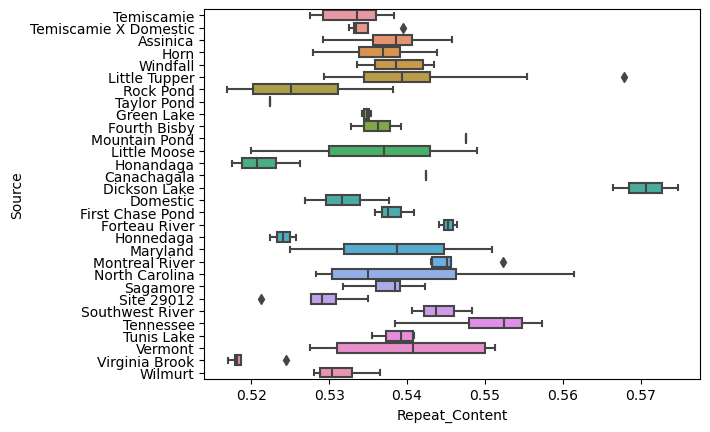

In [149]:
sns.boxplot(data=meta[meta["Repeat_Content"].notna()]
            [meta["Coverage"] > 0.3]
            [meta["Repeat_Content"] != 1], 
            x="Repeat_Content", y="Source")

In [8]:
repeatexplorer = meta[meta["Coverage"] > 0.5].reset_index(drop=True)

In [90]:
for samp in repeatexplorer["Sample_ID"].tolist():
    task = "repeatexplorer"
    mem = "100"
    cpus = "12"
    indir = "/storage/home/nsl5160/scratch/brook_trout/mapped/"
    infile = samp
    outdir = "/storage/home/nsl5160/scratch/brook_trout/repeatexplorer/" + samp
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + infile + " " + outdir], shell=True)

Submitted batch job 32912488
Submitted batch job 32912489
Submitted batch job 32912490
Submitted batch job 32912491
Submitted batch job 32912492
Submitted batch job 32912493
Submitted batch job 32912494
Submitted batch job 32912495
Submitted batch job 32912496
Submitted batch job 32912497
Submitted batch job 32912498
Submitted batch job 32912499
Submitted batch job 32912500
Submitted batch job 32912501
Submitted batch job 32912502
Submitted batch job 32912503
Submitted batch job 32912504
Submitted batch job 32912505
Submitted batch job 32912506
Submitted batch job 32912507
Submitted batch job 32912508
Submitted batch job 32912509
Submitted batch job 32912510
Submitted batch job 32912511
Submitted batch job 32912512
Submitted batch job 32912513
Submitted batch job 32912514
Submitted batch job 32912515
Submitted batch job 32912516
Submitted batch job 32912517
Submitted batch job 32912518
Submitted batch job 32912519
Submitted batch job 32912520
Submitted batch job 32912521
Submitted batc